In [2]:
import numpy as np
import pandas as pd


def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))


def k_means_clustering(data, k=3, max_iterations=10):
    if k > len(data):
        raise ValueError("Number of clusters (k) exceeds the number of data points.")


    cluster_means = data[np.random.choice(len(data), k, replace=False)]
    
    for _ in range(max_iterations):
     
        clusters = [[] for _ in range(k)]
        
 
        for point in data:
            distances = [euclidean_distance(point, mean) for mean in cluster_means]
            closest_cluster = np.argmin(distances)
            clusters[closest_cluster].append(point)
        
        for i in range(k):
            cluster_means[i] = np.mean(clusters[i], axis=0)
  
    print("Final Cluster Means:")
    for i, mean in enumerate(cluster_means):
        print(f"Cluster {i + 1}: {mean}")


file_path = 'D:/Datasets/iris.csv'
data = pd.read_csv(file_path)

print("First few rows of the dataset:")
print(data.head())

data = data.drop(['Id', 'Species'], axis=1)

data_points = data.values

print("\nNumber of data points:", len(data_points))
k_means_clustering(data_points, k=3, max_iterations=10)


First few rows of the dataset:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Number of data points: 150
Final Cluster Means:
Cluster 1: [5.88360656 2.74098361 4.38852459 1.43442623]
Cluster 2: [5.006 3.418 1.464 0.244]
Cluster 3: [6.85384615 3.07692308 5.71538462 2.05384615]


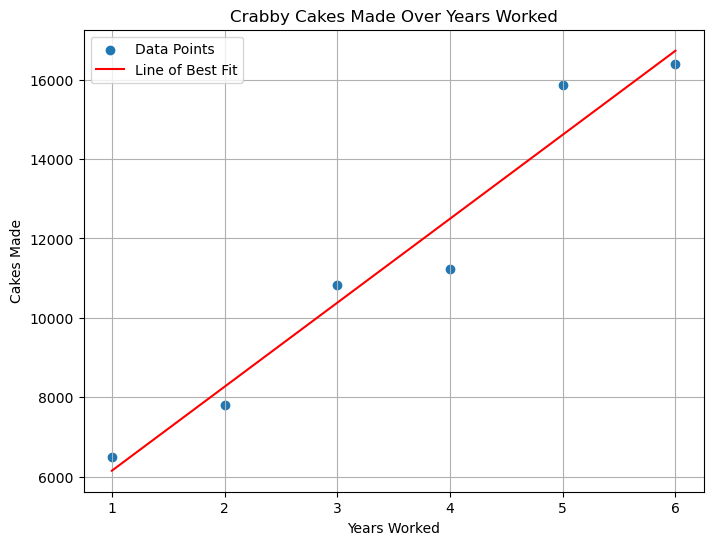

Correlation Coefficient (r): 0.9763211126242084
Type of Correlation: Positive
Predicted Cakes Made after 10 years: 25185.333333333336


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Given data
years_worked = np.array([1, 2, 3, 4, 5, 6])
cakes_made = np.array([6500, 7805, 10835, 11230, 15870, 16387])

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(years_worked, cakes_made, label='Data Points')
plt.xlabel('Years Worked')
plt.ylabel('Cakes Made')
plt.title('Crabby Cakes Made Over Years Worked')
plt.grid(True)
plt.legend()

# Linear regression
slope, intercept, r_value, _, _ = stats.linregress(years_worked, cakes_made)
line = slope * years_worked + intercept
plt.plot(years_worked, line, color='red', label='Line of Best Fit')

# Displaying the plot and line equation
plt.legend()
plt.show()

# Calculate the correlation coefficient
correlation_coefficient = r_value
print(f"Correlation Coefficient (r): {correlation_coefficient}")

# Determine the type of correlation
if correlation_coefficient > 0:
    correlation_type = "Positive"
elif correlation_coefficient < 0:
    correlation_type = "Negative"
else:
    correlation_type = "No Correlation"
print(f"Type of Correlation: {correlation_type}")

# Predict cakes made after 10 years using the linear regression equation
years_to_predict = 10
cakes_predicted = slope * years_to_predict + intercept
print(f"Predicted Cakes Made after {years_to_predict} years: {cakes_predicted}")


In [4]:
import pandas as pd
import statsmodels.api as sm

# Load the data from the Excel file
file_path = 'D:/Datasets/stock.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataset
print(data.head())

# Define the independent variables (Interest Rate and Unemployement_rate)
X = data[['Interest Rate', 'Unemployement_rate']]

# Add a constant for the intercept term
X = sm.add_constant(X)

# Define the dependent variable (Stock_index_price)
y = data['Stock_index_price']

# Create a multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

# Predict the stock index price for given interest_rate = 3 and unemployment_rate = 5.7
new_data = pd.DataFrame({'const': 1, 'Interest Rate': [3], 'Unemployement_rate': [5.7]})
predicted_stock_index_price = model.predict(new_data)
print("Predicted Stock Index Price:", predicted_stock_index_price)



   Interest Rate  Unemployement_rate  Stock_index_price
0           2.75                 5.3               1464
1           2.50                 5.3               1393
2           2.50                 5.3               1357
3           2.50                 5.3               1293
4           2.50                 5.4               1256
                            OLS Regression Results                            
Dep. Variable:      Stock_index_price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     91.40
Date:                Fri, 15 Dec 2023   Prob (F-statistic):           4.33e-11
Time:                        14:36:51   Log-Likelihood:                -134.70
No. Observations:                  24   AIC:                             275.4
Df Residuals:                      21   BIC:                             278.9
Df Model:                       

In [5]:
import pandas as pd
import statsmodels.api as sm

# Load the data from the Excel file
file_path = 'D:/Datasets/Car_data.xlsx'  # Replace with your file path
data = pd.read_excel(file_path)

# Display the first few rows of the dataset
print(data.head())

# Define the independent variables (Volume and Weight) and the dependent variable (CO2)
X = data[['Volume', 'Weight']]
y = data['CO2']

# Add a constant for the intercept term
X = sm.add_constant(X)

# Create a multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

# Predict CO2 emission for Volume 1300 and Engine weight 3300Kg
new_data = pd.DataFrame({'const': 1, 'Volume': [1300], 'Weight': [3300]})
predicted_CO2_emission = model.predict(new_data)
print("Predicted CO2 Emission:", predicted_CO2_emission)


   Volume  Weight  CO2
0    1000     790   99
1    1200    1160   95
2    1000     929   95
3     900     865   90
4    1500    1140  105
                            OLS Regression Results                            
Dep. Variable:                    CO2   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     9.966
Date:                Fri, 15 Dec 2023   Prob (F-statistic):           0.000411
Time:                        14:39:05   Log-Likelihood:                -114.39
No. Observations:                  36   AIC:                             234.8
Df Residuals:                      33   BIC:                             239.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your dataset
# Replace 'your_dataset.xlsx' with the actual filename and path
data = pd.read_excel('D:/Datasets/Bank2.xlsx')

# Assuming 'Subscription' is the label column
X = data.drop('Subscription', axis=1)  # Features
y = data['Subscription']  # Labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.8181818181818182
Confusion Matrix:
[[5 0]
 [2 4]]
Classification Report:
              precision    recall  f1-score   support

          no       0.71      1.00      0.83         5
         yes       1.00      0.67      0.80         6

    accuracy                           0.82        11
   macro avg       0.86      0.83      0.82        11
weighted avg       0.87      0.82      0.82        11



               name   Longitude   Latitude  Cluster
0             Aruba  -69.982677  12.520880        1
1       Afghanistan   66.004734  33.835231        0
2            Angola   17.537368 -12.293361        0
3          Anguilla  -63.064989  18.223959        1
4           Albania   20.049834  41.142450        0
..              ...         ...        ...      ...
144         Myanmar   96.488433  21.185666        2
145      Montenegro   19.238839  42.788903        0
146        Mongolia  103.052998  46.826815        2
147  N. Mariana Is.  145.619697  15.829276        2
148      Mozambique   35.533675 -17.273816        0

[149 rows x 4 columns]


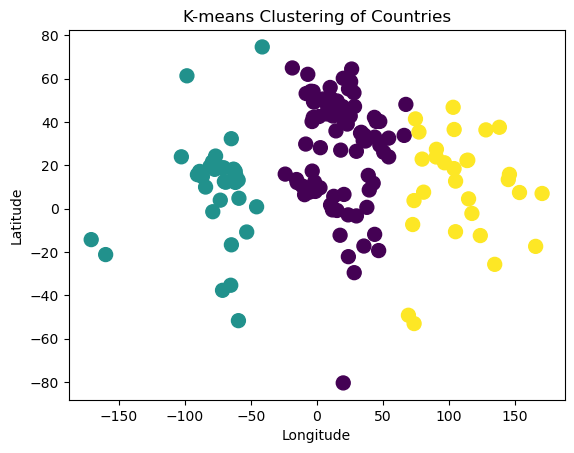

In [7]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load dataset from Excel file
file_path = r'D:\Datasets\Countries_dataset1.xlsx'
df = pd.read_excel(file_path)

# Select the features (latitude and longitude)
X = df[["Latitude", "Longitude"]]

# Choose the number of clusters (K)
k = 3  # You can change this value based on your requirements

# Create a KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model to the data
kmeans.fit(X)

# Add cluster labels to the dataset
df["Cluster"] = kmeans.labels_

# Display the clusters
print(df)

# Plot the clusters on a map
plt.scatter(df["Longitude"], df["Latitude"], c=df["Cluster"], cmap="viridis", s=100)
plt.title("K-means Clustering of Countries")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


            name   Longitude   Latitude  Cluster
0     Mauritania  -10.347798  20.257367        0
1     Montserrat  -62.185185  16.739414        3
2      Mauritius   57.571206 -20.277687        0
3         Malawi   34.289356 -13.218081        0
4       Malaysia  109.697623   3.789868        2
..           ...         ...        ...      ...
87         Samoa -172.164851 -13.753243        1
88         Yemen   47.586762  15.909280        0
89  South Africa   25.083901 -29.000341        0
90        Zambia   27.774759 -13.458242        0
91      Zimbabwe   29.851441 -19.004204        0

[92 rows x 4 columns]


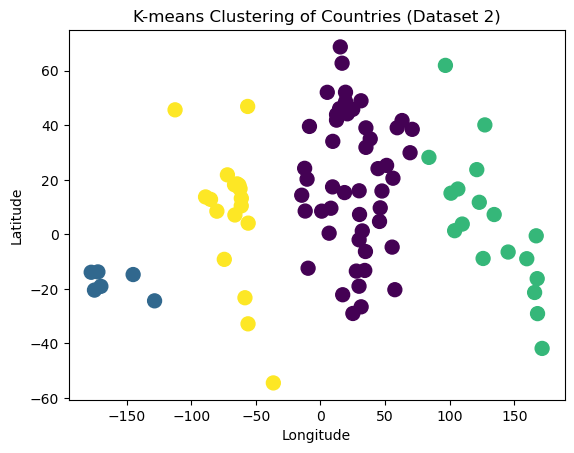

In [8]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load dataset from Excel file
file_path = r'D:\Datasets\Countries_dataset2.xlsx'
df = pd.read_excel(file_path)

# Select the features (latitude and longitude)
X = df[["Latitude", "Longitude"]]

# Choose the number of clusters (K)
k = 4  # You can change this value based on your requirements

# Create a KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model to the data
kmeans.fit(X)

# Add cluster labels to the dataset
df["Cluster"] = kmeans.labels_

# Display the clusters
print(df)

# Plot the clusters on a map
plt.scatter(df["Longitude"], df["Latitude"], c=df["Cluster"], cmap="viridis", s=100)
plt.title("K-means Clustering of Countries (Dataset 2)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset from CSV file
file_path = r'D:\Datasets\iris.csv'
df = pd.read_csv(file_path)

# Update the column names based on your dataset
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.00
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load the dataset from CSV file
file_path = r'D:\Datasets\Social_Network_Ads1.csv'
df = pd.read_csv(file_path)

# Assuming your dataset has columns 'Age', 'EstimatedSalary', and 'Purchased'
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

# Standardize the features (important for GaussianNB)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.94
Confusion Matrix:
[[50  2]
 [ 3 25]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        52
           1       0.93      0.89      0.91        28

    accuracy                           0.94        80
   macro avg       0.93      0.93      0.93        80
weighted avg       0.94      0.94      0.94        80



In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load the dataset from CSV file
file_path = r'D:\Datasets\Social_Network_Ads2.csv'
df = pd.read_csv(file_path)

# Assuming your dataset has columns 'Age', 'EstimatedSalary', and 'Purchased'
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

# Standardize the features (important for GaussianNB)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.88
Confusion Matrix:
[[34  2]
 [ 3  3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        36
           1       0.60      0.50      0.55         6

    accuracy                           0.88        42
   macro avg       0.76      0.72      0.74        42
weighted avg       0.87      0.88      0.88        42



In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load the dataset from CSV file
file_path = r'D:\Datasets\Social_Network_Ads1.csv'
df = pd.read_csv(file_path)

# Assuming your dataset has columns 'Age', 'EstimatedSalary', and 'Purchased'
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

# Standardize the features (important for SVM)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.86
Confusion Matrix:
[[50  2]
 [ 9 19]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.90      0.68      0.78        28

    accuracy                           0.86        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.87      0.86      0.86        80



In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load the dataset from CSV file
file_path = r'D:\Datasets\Social_Network_Ads2.csv'
df = pd.read_csv(file_path)

# Assuming your dataset has columns 'Age', 'EstimatedSalary', and 'Purchased'
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

# Standardize the features (important for SVM)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.88
Confusion Matrix:
[[34  2]
 [ 3  3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        36
           1       0.60      0.50      0.55         6

    accuracy                           0.88        42
   macro avg       0.76      0.72      0.74        42
weighted avg       0.87      0.88      0.88        42

